In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Closed-Form Linear Regression

There are various ways to perform linear regression and as a machine learning begginer i thought the only way was using optimization thru gradient descent until i discovered that there's a more mathematical way to do it using linear algebra. 

Turns out that we can find the coeficients for y = mx + b directly without going fisrt thru a loss metric and then trying to optimize that, this is called the closed-form linear regression

But first we need some requirements before using this technique

* We'll perform inversion, so the matrix that we are going to use needs to be invertible
* Data set values needs to be linearly independent

let's see what we are going to implement

To find the coeficients directly we'll use 

First we need data, this means we'll generate some artificial data for the task

In [14]:
np.random.seed(42)

# Generate artificial dataset
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

print(X)
# print(y)

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [0.39

Now that we have data, we can procceed with the implementation for the coefficients, in order to do this we need to prepare X and we do it by adding ones into it, this is because we need a base line, the way linear regression works needs a point of start so in this case the intercepts are going to be just ones but we'll update it after calculating the coefficients.

In [15]:
X_with_ones = np.c_[np.ones(X.shape[0]), X]
X_with_ones

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

Then we can calculate the coefficients

In [17]:
coefficients = np.linalg.inv(X_with_ones.T @ X_with_ones) @ X_with_ones.T @ y
coefficients

array([[4.21509616],
       [2.77011339]])

Notice that because we are using only 1 'feature' in X we obtain first the coefficient of the intercept and after that the coefficient for the only 'feature' we have, we can put both lines of code in a function and pass as a paremeter X and y

In [18]:
def linear_regression_closed_form(X, y):
    X_with_ones = np.c_[np.ones(X.shape[0]), X]
    coefficients = np.linalg.inv(X_with_ones.T @ X_with_ones) @ X_with_ones.T @ y
    return coefficients

Now we can grab the coefficients easily

In [19]:
coefficients = linear_regression_closed_form(X, y)
coefficients

array([[4.21509616],
       [2.77011339]])

Finally we can check the results plotting this against the artifitial datasets

coefficients [[4.21509616]
 [2.77011339]]
Intercept: 4.21509615754675
Slope: 2.7701133864384806


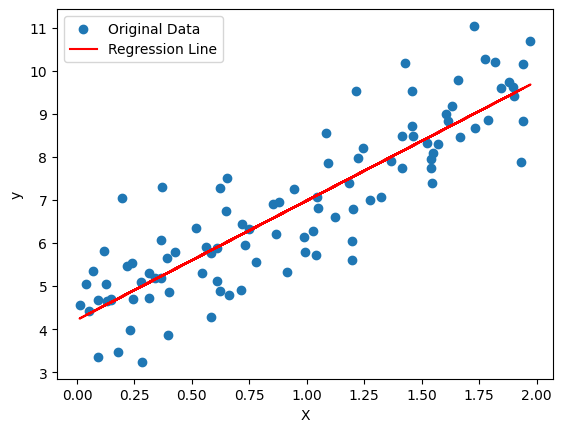

In [20]:
# Print the coefficients
print("coefficients", coefficients)
print("Intercept:", coefficients[0][0])
print("Slope:", coefficients[1][0])

# Plot the original data and the regression line
plt.scatter(X, y, label='Original Data')
plt.plot(X, coefficients[0] + coefficients[1] * X, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

That's it, now we have implemented the closed-form linear regression